# Example for computing and plotting tSZ-Cls from Random forest
      

In [7]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(1,"./")
sys.path.insert(1,"./tszcl_src/")
from Highell_Cls import Cl_tsz_fromRF

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors, cm, rc
rc('font',**{'family':'serif', 'serif':['times new roman'], 'size': 16})
rc('text', usetex=True)

Define the dictionary containing the parameter values.

In [9]:
C_SR_params={"bias": 0.8,
            "H0": 64,
            "omb": 0.05,
            "om": 0.31,
            "sig8": 0.8,
            "alpha":1.77}

The `Cl_tsz_fromRF` outputs the tSZ angular power spectrum at 143GHz for $2 \leq \ell \leq 13500$.

In [10]:
ell_ref, Cl_ref = Cl_tsz_fromRF(C_SR_params, coeff_path="tszcl_coeff/")

Text(0.5, 0, 'Angular multipole $\\ell$')

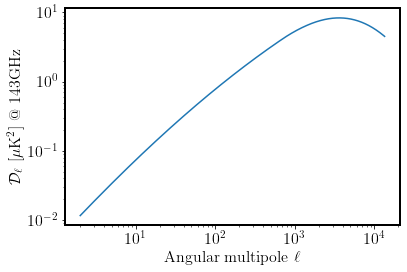

In [11]:
plt.loglog(ell_ref, Cl_ref)
plt.ylabel(r"$\mathcal{D}_\ell~[\mu \mathrm{K}^2]$ @ 143GHz")
plt.xlabel(r"Angular multipole $\ell$")

Plot for a range of parameter values:

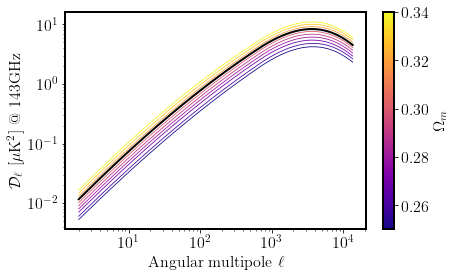

In [6]:
om_range =  0.25+0.01*np.arange(10)
cmap = cm.get_cmap('plasma')
norm = colors.Normalize(vmin=np.min(om_range), vmax=np.max(om_range)) 

plt.loglog(ell_ref, Cl_ref, linewidth=2.0, color='k', zorder=2)
for om in om_range:
    C_SR_params={"bias": 0.8,
            "H0": 64,
            "omb": 0.05,
            "om": om,
            "sig8": 0.8,
            "alpha":1.77}
    ell_ref, Cl_i = Cl_tsz_fromRF(C_SR_params, coeff_path="tszcl_coeff/")
    plt.loglog(ell_ref, Cl_i, color=cmap(norm(om)), zorder=0, lw=.8)
plt.ylabel(r"$\mathcal{D}_\ell~[\mu \mathrm{K}^2]$ @ 143GHz")
plt.xlabel(r"Angular multipole $\ell$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
c_bar=plt.colorbar(sm, fraction=0.05)
c_bar.set_label(r'$\Omega_m$')